### 1.

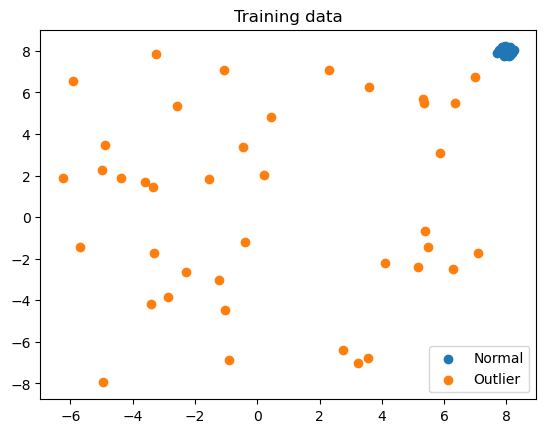

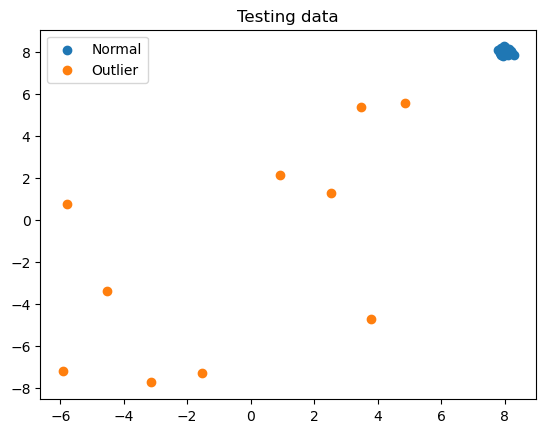

In [97]:
import matplotlib.pyplot as plt
import numpy as np
from pyod.utils.data import generate_data

def scatter_contaminated_data(x: np.ndarray, y: np.ndarray):
    normal_train = x[y == 0]
    outlier_train = x[y == 1]
    plt.scatter(normal_train[:, 0], normal_train[:, 1], label="Normal")
    plt.scatter(outlier_train[:, 0], outlier_train[:, 1], label="Outlier")
    plt.legend()

x_train, x_test, y_train, y_test = generate_data(n_train=400, n_test=100, n_features=2, contamination=0.1)
plt.title("Training data")
scatter_contaminated_data(x=x_train, y=y_train)
plt.show()
plt.title("Testing data")
scatter_contaminated_data(x=x_test, y=y_test)
plt.show()

### Ex. 2

c:\Users\popas\anaconda3\envs\ad\Lib\site-packages\pyod\models\base.py:423: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


Train predictions:
Balanced accuracy: 1.000
[[360   0]
 [  0  40]]

Test predictions:
Balanced accuracy: 1.000
[[90  0]
 [ 0 10]]


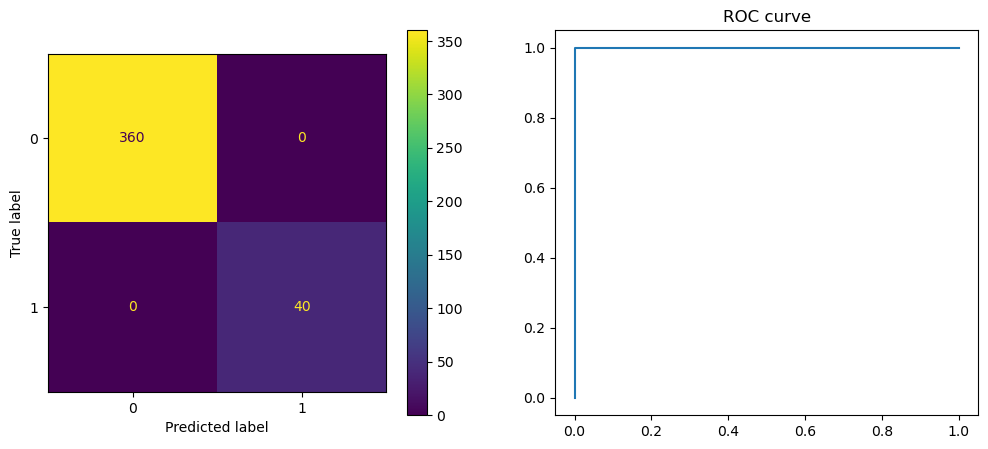

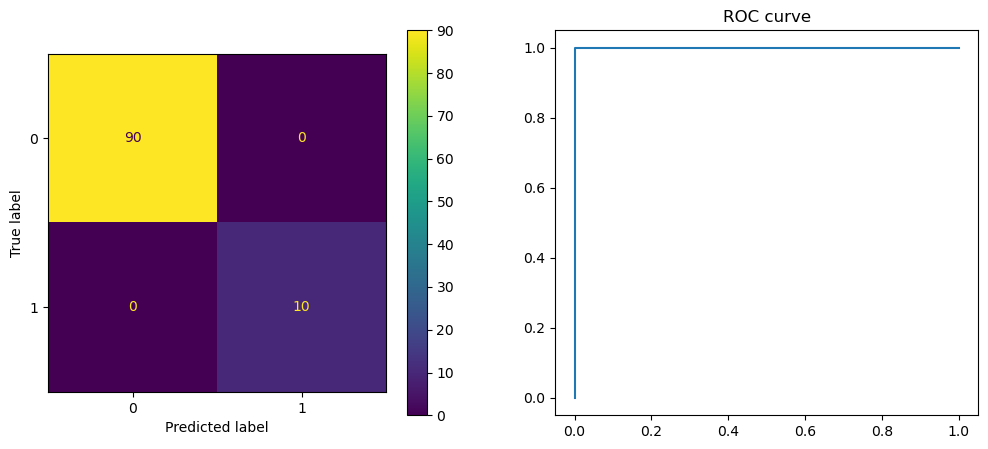

In [99]:
import numpy as np
from pyod.models.knn import KNN
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve

def report(y_true: np.ndarray, y_pred: np.ndarray) -> None:
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    tpr = tp / (tp + fn)
    tnr = tn / (tn + fp)
    ba = (tpr + tnr) / 2
    print(f"Balanced accuracy: {ba:.3f}")
    print(cm)
    disp = ConfusionMatrixDisplay(cm)
    disp.plot(ax=axes[0])

    fpr, tpr, thresholds = roc_curve(y_true, y_score=y_pred)
    axes[1].plot(fpr, tpr)
    axes[1].set_title("ROC curve")

model = KNN()
model.fit(x_train, y_train)
pred_train = model.predict(x_train)
pred_test = model.predict(x_test)

# Train predictions CM
print(f"Train predictions:")
report(y_true=y_train, y_pred=pred_train)

# Test predictions CM
print()
print(f"Test predictions:")
report(y_true=y_test, y_pred=pred_test)

### Ex. 3

Balanced accuracy: 0.894
[[881  19]
 [ 19  81]]


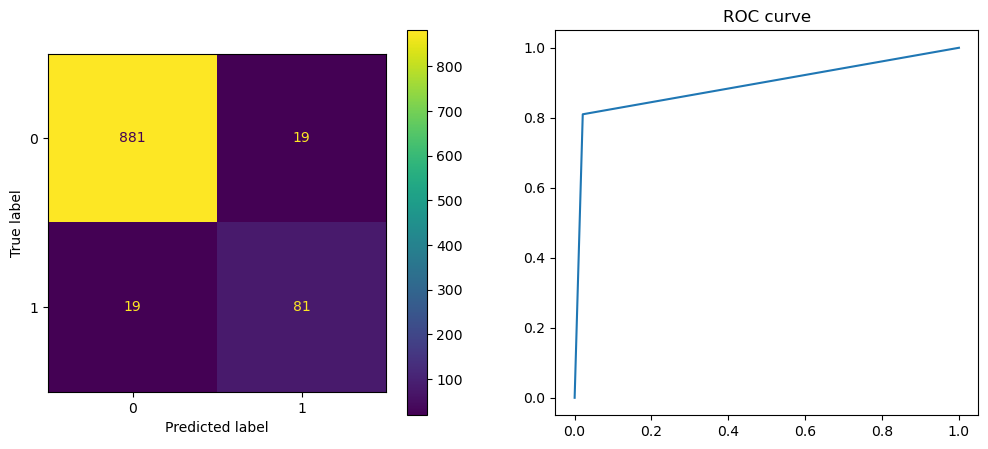

In [175]:
x_train, x_test, y_train, y_test = generate_data(n_train=1000, n_test=0, n_features=1, contamination=0.1)
mean, var = np.mean(x_train), np.std(x_train)

# Compute z-scores
z_scores = np.abs(x_train - mean) / var
threshold = np.quantile(z_scores, q=0.9)
pred_train = np.squeeze((z_scores > threshold) * 1)
report(y_true=y_train, y_pred=pred_train)

### Ex. 4

### Steps



In [177]:
n_features = 2
mean = [0.3, 0.9]
L = [[0.2, 0.7], [0.5, 0.4]]
S = np.matmul(L, np.transpose(L))
print(S)

[[0.53 0.38]
 [0.38 0.41]]
